### 1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).


In [1]:
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
import keras
import seaborn as sns; 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
data = fetch_openml('Fashion-MNIST', as_frame=False, parser='auto')

In [3]:
list(data)

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

In [4]:
print(data.DESCR)

**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  
**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

Raw data available at: https://github.com/zalandoresearch/fashion-mnist

### Target classes
Each training and test example is assigned to one of the following labels:
Label  Description  
0  T-shirt/top  
1  Trouser  
2  Pullover  
3  Dress  
4  

In [5]:
data.data.shape

(70000, 784)

In [6]:
data.target.shape

(70000,)

In [7]:
X = data.data
y = to_categorical(data.target)

In [8]:
X[0].shape

(784,)

In [9]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

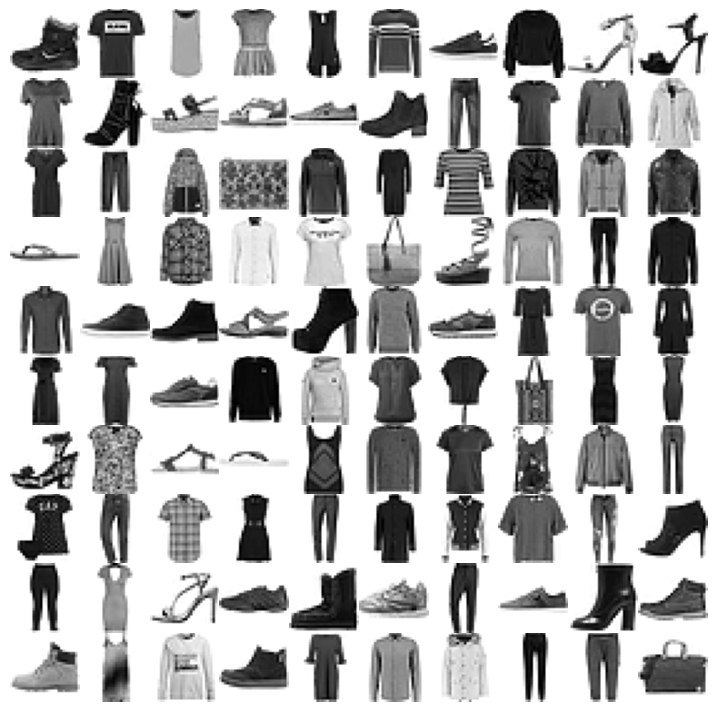

In [10]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

### 2. Train a dense neural network using Keras

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
def make_model(model_params):
    model = Sequential()

    if len(model_params['layers']) == 0:
        model.add(Dense(model_params['output'], input_dim=model_params['input'], activation='softmax'))

    else:
        model.add(Dense(model_params['layers'][-1], input_dim=model_params['input'], activation='relu'))
        
        for i in range(len(model_params['layers']) - 1):
            model.add(Dense(i, activation='relu'))

        model.add(Dense(10, activation='softmax'))

    return model
        

In [33]:
def fit_model(model, epochs):
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=64, verbose=0)
    return model, history

In [14]:

def one_hot_to_label(one_hot):
    label = list()

    for i in range(len(one_hot)):
        label.append(np.argmax(one_hot[i]))

    return label

In [22]:
def evaluate_model(y_test, y_pred, labels):
  y_pred = one_hot_to_label(y_pred)
  y_test = one_hot_to_label(y_test)
  cm = confusion_matrix(y_test, y_pred)
  cr = classification_report(y_test, y_pred)

  sns.heatmap(cm.T, square=True, annot=True, fmt='d', xticklabels = labels, yticklabels = labels)
  plt.xlabel('true label')
  plt.ylabel('predicted label')
  plt.show()
  print(cr)

In [39]:
def build_and_evaluate_model(model_params):
    model = make_model(model_params)
    model, history = fit_model(model,model_params['epochs'])
    y_pred = model.predict(X_test, verbose=0)
    evaluate_model(y_test, y_pred, model_params['labels'])

    plt.plot(history.history['loss'])
    plt.locator_params(axis="both", integer=True) 
    plt.title('Model loss') 
    plt.ylabel('Loss') 
    plt.xlabel('Epoch') 
    plt.legend(['Train', 'Test'], loc='upper left') 
    plt.show()

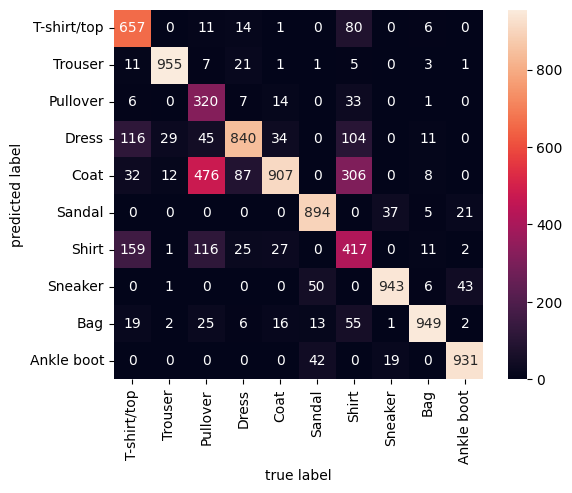

              precision    recall  f1-score   support

           0       0.85      0.66      0.74      1000
           1       0.95      0.95      0.95      1000
           2       0.84      0.32      0.46      1000
           3       0.71      0.84      0.77      1000
           4       0.50      0.91      0.64      1000
           5       0.93      0.89      0.91      1000
           6       0.55      0.42      0.47      1000
           7       0.90      0.94      0.92      1000
           8       0.87      0.95      0.91      1000
           9       0.94      0.93      0.93      1000

    accuracy                           0.78     10000
   macro avg       0.81      0.78      0.77     10000
weighted avg       0.81      0.78      0.77     10000



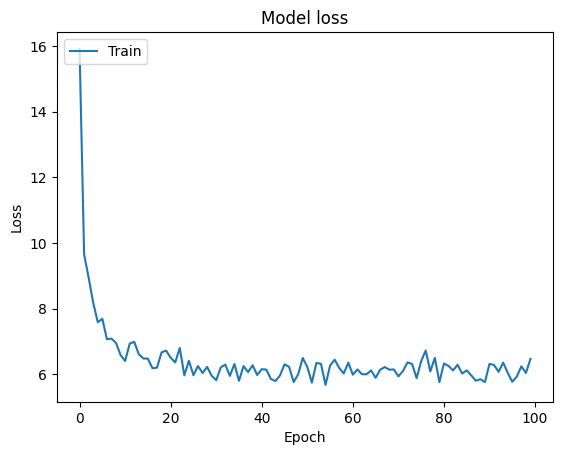

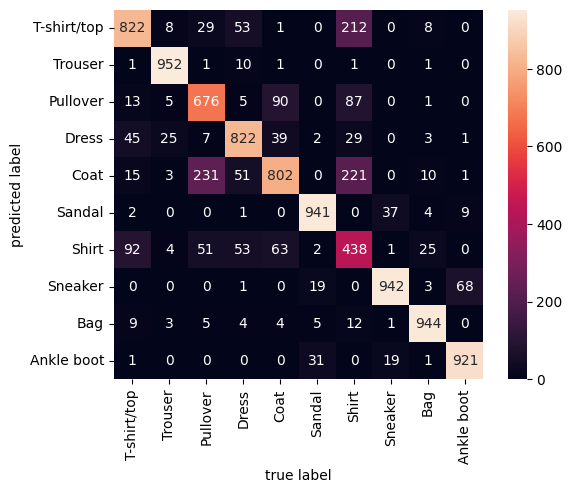

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1000
           1       0.98      0.95      0.97      1000
           2       0.77      0.68      0.72      1000
           3       0.84      0.82      0.83      1000
           4       0.60      0.80      0.69      1000
           5       0.95      0.94      0.94      1000
           6       0.60      0.44      0.51      1000
           7       0.91      0.94      0.93      1000
           8       0.96      0.94      0.95      1000
           9       0.95      0.92      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.82     10000
weighted avg       0.83      0.83      0.82     10000



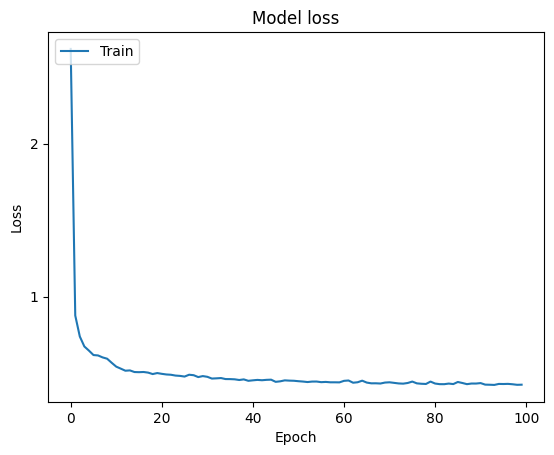

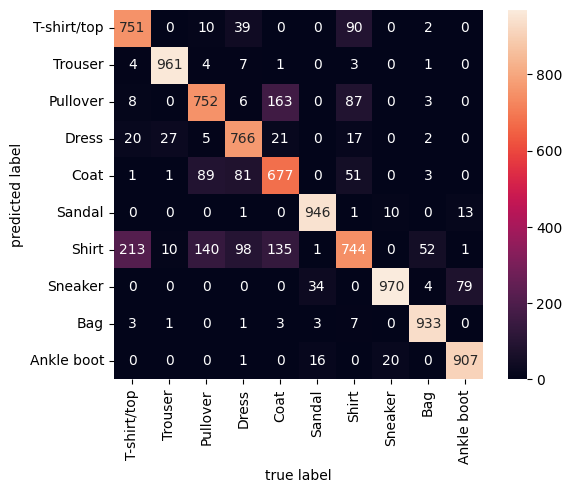

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1000
           1       0.98      0.96      0.97      1000
           2       0.74      0.75      0.74      1000
           3       0.89      0.77      0.82      1000
           4       0.75      0.68      0.71      1000
           5       0.97      0.95      0.96      1000
           6       0.53      0.74      0.62      1000
           7       0.89      0.97      0.93      1000
           8       0.98      0.93      0.96      1000
           9       0.96      0.91      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



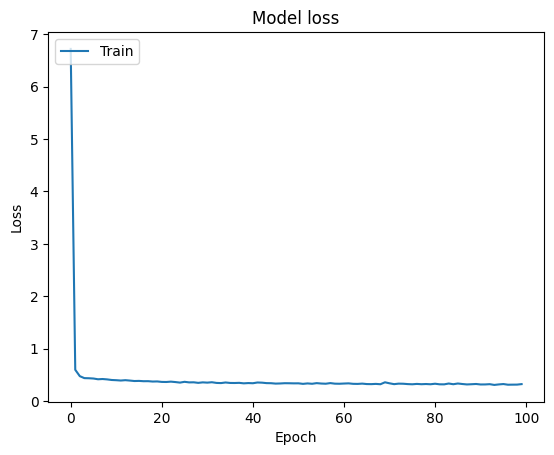

d:\Source\AI&ML\FML\CSCN8010\venv\tensorflow_cpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Source\AI&ML\FML\CSCN8010\venv\tensorflow_cpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Source\AI&ML\FML\CSCN8010\venv\tensorflow_cpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

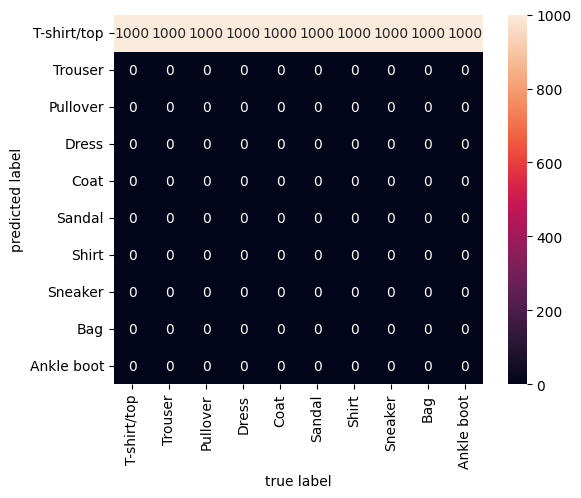

              precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



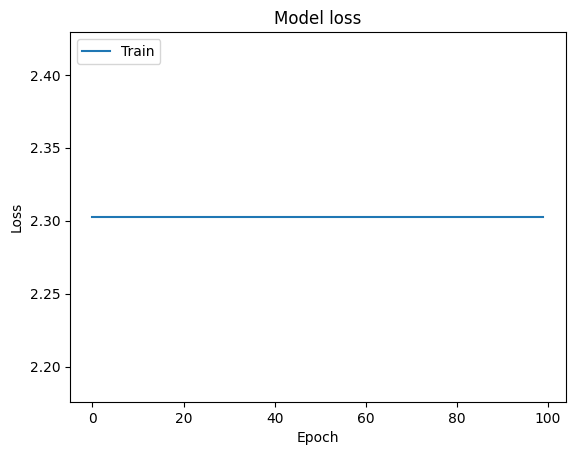

d:\Source\AI&ML\FML\CSCN8010\venv\tensorflow_cpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Source\AI&ML\FML\CSCN8010\venv\tensorflow_cpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Source\AI&ML\FML\CSCN8010\venv\tensorflow_cpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

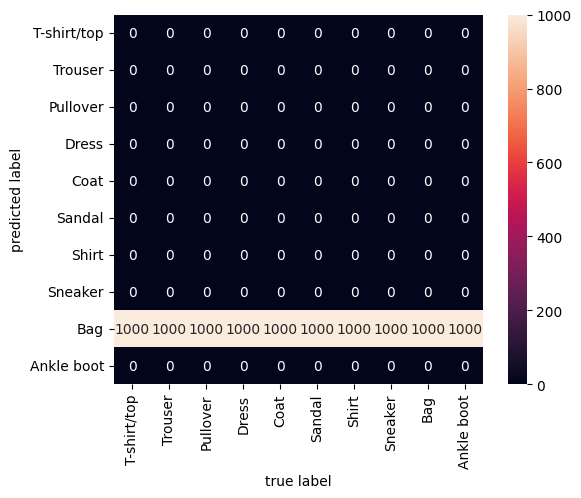

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.10      1.00      0.18      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



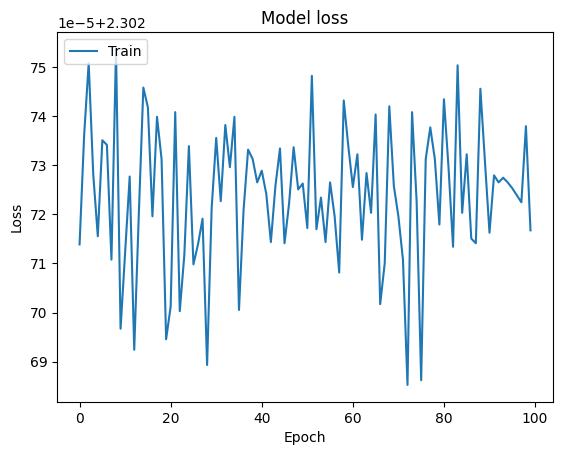

d:\Source\AI&ML\FML\CSCN8010\venv\tensorflow_cpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Source\AI&ML\FML\CSCN8010\venv\tensorflow_cpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Source\AI&ML\FML\CSCN8010\venv\tensorflow_cpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

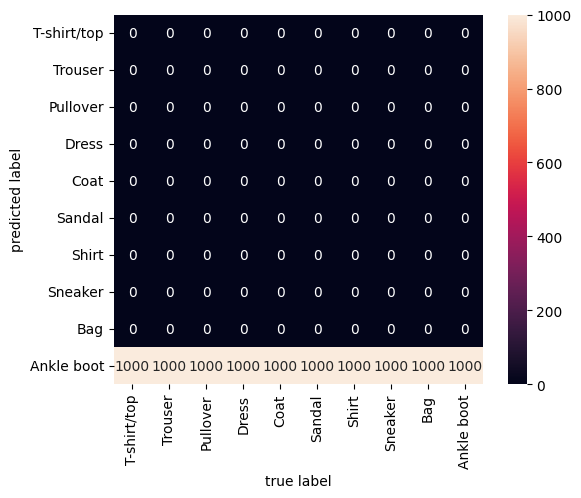

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.10      1.00      0.18      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



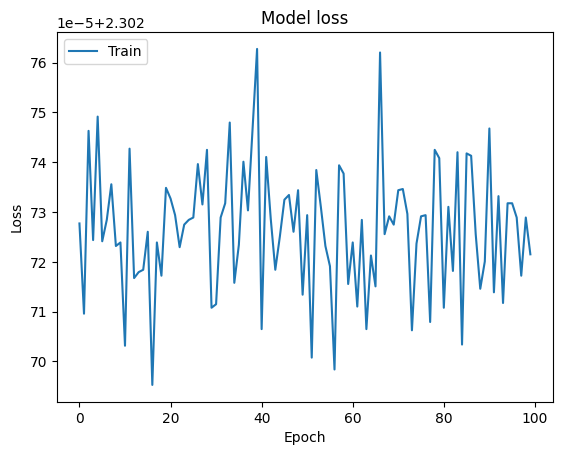

d:\Source\AI&ML\FML\CSCN8010\venv\tensorflow_cpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Source\AI&ML\FML\CSCN8010\venv\tensorflow_cpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Source\AI&ML\FML\CSCN8010\venv\tensorflow_cpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

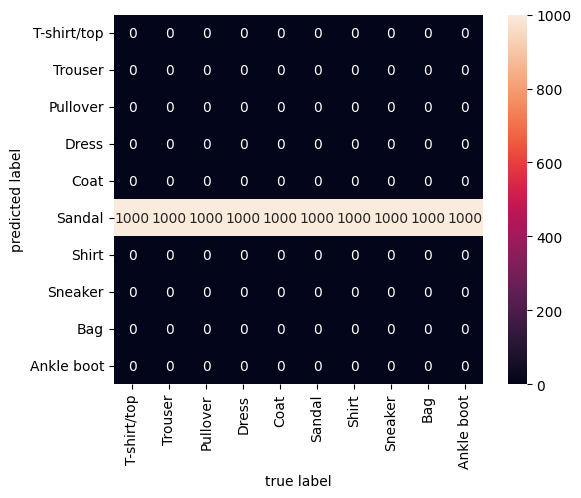

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.10      1.00      0.18      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



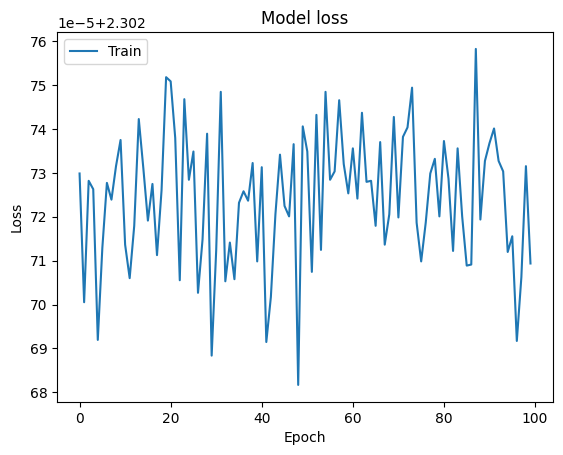

In [42]:
params = {
    'labels': ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"],
    'epochs': 100,
    'input': 784,
    'output': 10,
}

models = [[],[50],[392],[392,196],[392,196,98],[392,196,98,49],[392,196,98,49,24]]

for model in models:
    params['layers'] = model
    build_and_evaluate_model(params)

It is interesting to see that where it got confused is between similar items. The shirt is mainly confused with T-shirt/top, pullover, coat, and dress. All of these are, for the most part, the same shape and reflects in the precision and recall values; they are the lowest across the board. On the other hand, the item with the best scores is the most unique out of the list, trousers.